In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv(r'C:\Users\sathv\OneDrive\Desktop\Major Project\uqvitalsignsdata\combined_output.csv')
#df = df.iloc[:, 1:]
df

,Time,HR,Pulse,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,...,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,00:00:00_000,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.305,0.36850,0.0,0.54707,11.79334,0.0
1,00:00:00_010,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.310,0.36801,0.0,0.57335,11.76310,0.0
2,00:00:00_020,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36728,0.0,0.58127,11.73633,0.0
3,00:00:00_030,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36630,0.0,0.55086,11.79232,0.0
4,00:00:00_040,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.330,0.36508,0.0,0.54186,11.67379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,01:59:59_950,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.40098,36.7,8.17264,44.69420,593.5
719996,01:59:59_960,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.39780,36.7,8.13857,44.88082,600.9
719997,01:59:59_970,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39658,36.7,8.12056,44.71950,608.4
719998,01:59:59_980,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39609,36.7,8.11281,44.32515,615.8


In [69]:
df.isnull().sum().sum()

0

In [68]:
df =df.fillna(0)

In [100]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)



<Axes: >

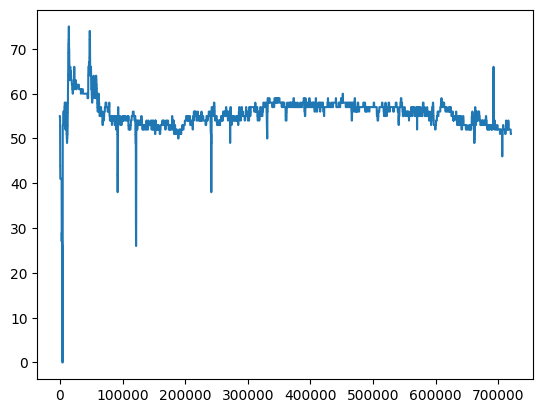

In [71]:
pulse = df['Pulse']
pulse.plot()

In [101]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(pulse, WINDOW_SIZE)
X1.shape, y1.shape

((719995, 5, 1), (719995,))

In [73]:
X_train1, y_train1 = X1[:600000], y1[:600000]
X_val1, y_val1 = X1[600000:650000], y1[600000:650000]
X_test1, y_test1 = X1[650000:], y1[650000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((600000, 5, 1), (600000,), (50000, 5, 1), (50000,), (69995, 5, 1), (69995,))

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [78]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
18750/18750 [==============================] - 79s 4ms/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 2/10
18750/18750 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0882

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


18750/18750 [==============================] - 78s 4ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 3/10
18750/18750 [==============================] - 75s 4ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 4/10
18750/18750 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.0876

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


18750/18750 [==============================] - 72s 4ms/step - loss: 0.0077 - root_mean_squared_error: 0.0876 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 5/10
18750/18750 [==============================] - 73s 4ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 6/10
18750/18750 [==============================] - 72s 4ms/step - loss: 0.0076 - root_mean_squared_error: 0.0869 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 7/10
18750/18750 [==============================] - 72s 4ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 8/10
18739/18750 [============================>.] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0868

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


18750/18750 [==============================] - 83s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 9/10
18750/18750 [==============================] - 80s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 10/10
18750/18750 [==============================] - 81s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0596


In [81]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [82]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

18750/18750 [==============================] - 26s 1ms/step


,Train Predictions,Actuals
0,54.999969,55.0
1,54.999969,55.0
2,54.999969,55.0
3,54.999969,55.0
4,54.999969,55.0
...,...,...
599995,52.999996,53.0
599996,52.999996,53.0
599997,52.999996,53.0
599998,52.999996,53.0


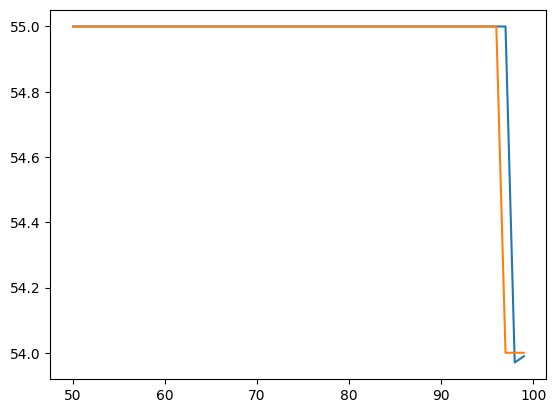

In [83]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [85]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1563/1563 [==============================] - 3s 2ms/step


,Val Predictions,Actuals
0,52.999996,53.0
1,52.999996,53.0
2,52.999996,53.0
3,52.999996,53.0
4,52.999996,53.0
...,...,...
49995,51.999641,52.0
49996,51.999641,52.0
49997,51.999641,52.0
49998,51.999641,52.0


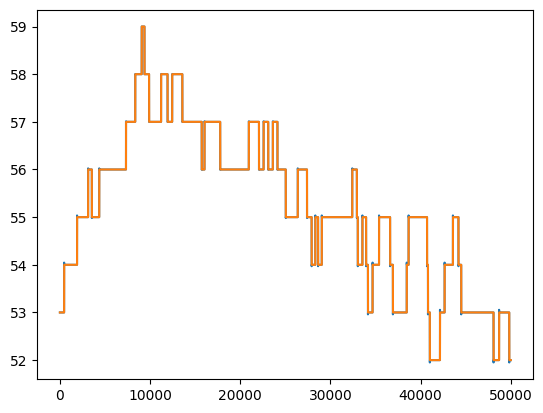

In [87]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [88]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

2188/2188 [==============================] - 3s 2ms/step


,Test Predictions,Actuals
0,51.999641,52.0
1,51.999641,52.0
2,51.999641,52.0
3,51.999641,52.0
4,51.999641,52.0
...,...,...
69990,50.999001,51.0
69991,50.999001,51.0
69992,50.999001,51.0
69993,50.999001,51.0


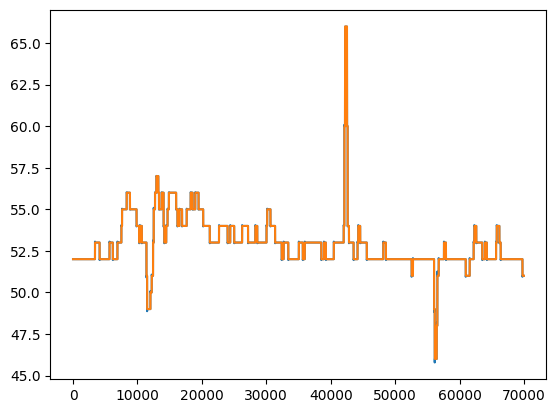

In [90]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])